La página web que pide el ejercicio es: https://ycharts.com/companies/TSLA/revenues. 
Pero ya no tiene permisos para conectarse por lo que usaré para hacer el ejercicio: https://companiesmarketcap.com/tesla/revenue/

**Tareas**

- Recopilar y almacenar información sobre el crecimiento de la compañía anualmente. 
- Almacenar el texto scrapeado de la web en alguna variable.

In [1]:
import requests 
import time
import pandas as pd
import matplotlib.pyplot as plt 

In [11]:
url = "https://companiesmarketcap.com/tesla/revenue/"
html_data = requests.get(url, time.sleep(10)).text

# If no information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>Tesla (TSLA) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel="icon

In [12]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ico

In [ ]:
# Encontrar la tabla
table = soup.find("table")
table

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span> (TTM) <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="2 Oct 2023 - 30 Sep 2024"/></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2023 - 31 Dec 2023"/></td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2022 - 31 Dec 2022"/></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span>

In [ ]:
# Extraer los encabezados de la tabla 
headers = [header.text for header in table.find_all('th')]

# Extraer los renglones de la tabla
rows = [] 
for row in table.find_all('tr')[1:]: 
    cells = row.find_all('td') 
    cells = [cell.text.strip() for cell in cells] 
    rows.append(cells)

# Crear el dataframe para almacenar el texto
df = pd.DataFrame(rows, columns=headers)
df['Year'] = df['Year'].apply(lambda x: x.split()[0]) 
df['Revenue'] = df['Revenue'].replace(r'[\$, B]', '', regex=True).astype(float)
df['Change'] = df['Change'].replace(r'[\%,]', '', regex=True)
df['Change'] = pd.to_numeric(df['Change'], errors='coerce')
print(df)

    Year  Revenue  Change
0   2024    97.15    0.39
1   2023    96.77   18.80
2   2022    81.46   51.35
3   2021    53.82   70.67
4   2020    31.53   28.31
5   2019    24.57   14.52
6   2018    21.46   82.51
7   2017    11.75   67.98
8   2016     7.00   73.01
9   2015     4.04   26.50
10  2014     3.19   58.85
11  2013     2.01  387.23
12  2012     0.41  102.34
13  2011     0.20   74.95
14  2010     0.11    4.29
15  2009     0.11     NaN


In [30]:
# Eliminar na
df = df.dropna()
df


,Year,Revenue,Change
0,2024,97.15,0.39
1,2023,96.77,18.80
2,2022,81.46,51.35
3,2021,53.82,70.67
4,2020,31.53,28.31
5,2019,24.57,14.52
6,2018,21.46,82.51
7,2017,11.75,67.98
8,2016,7.00,73.01
9,2015,4.04,26.50


In [31]:
# Estadísitica descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,15.0,29.031333,35.825751,0.11,2.60,11.75,42.675,97.15
Change,15.0,70.780000,92.902211,0.39,22.65,58.85,73.980,387.23


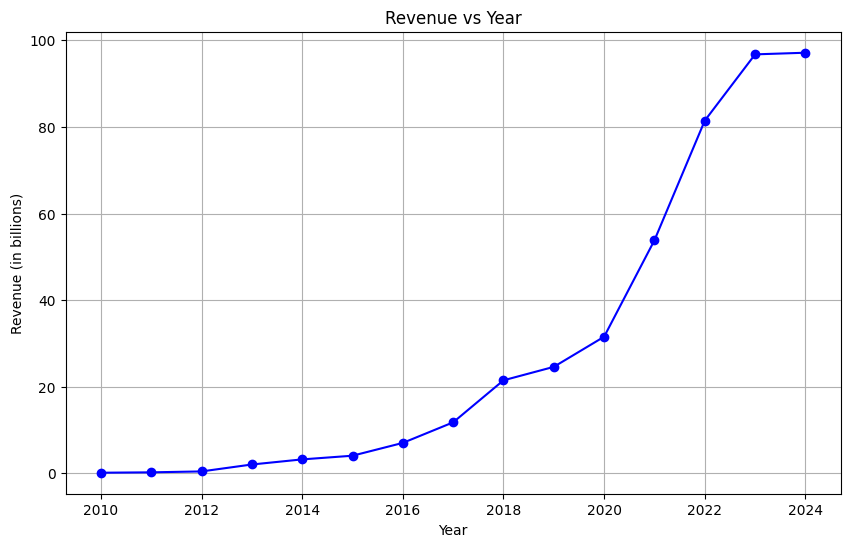

In [32]:
# Gráfica de las ganacias vs año
# Convierto el año a variable numérica
df['Year'] = df['Year'].astype(int)

# Creo la gráfica
plt.figure(figsize=(10, 6)) 
plt.plot(df['Year'], df['Revenue'], marker='o', linestyle='-', color='b')

# Agrego los títulos
plt.title('Revenue vs Year') 
plt.xlabel('Year') 
plt.ylabel('Revenue (in billions)')

# Muestro la gráfica
plt.grid(True) 
plt.show()